In [206]:
import tensorflow as tf
import sklearn
import matplotlib as plt
import matplotlib.pylab as plt
import jupyterlab
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
import seaborn as sns
from sklearn.metrics import r2_score
import visuals as vs
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

# GPU 확인 
- C:\Program Files\NVIDIA Corporation\NVSMI 에서 nvidia-smi.exe 실행`

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [160]:
df_data = pd.read_csv('BostonHousing.csv')
print(df_data.shape)

(506, 14)


In [161]:
df_data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


[01]  CRIM 자치시(town) 별 1인당 범죄율  
[02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  
[03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율 
[04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
[05]  NOX 10ppm 당 농축 일산화질소 
[06]  RM 주택 1가구당 평균 방의 개수  
[07]  AGE 1940년 이전에 건축된 소유주택의 비율 
[08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수  
[09]  RAD 방사형 도로까지의 접근성 지수  
[10]  TAX 10,000 달러 당 재산세율  
[11]  PTRATIO 자치시(town)별 학생/교사 비율  
[12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
[13]  LSTAT 모집단의 하위계층의 비율(%)  
[14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)


- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.


- 출처: http://ai-times.tistory.com/431 [ai-times]
- https://www.kaggle.com/porpheto/boston-housing

In [162]:
# calculate the correlation of MEDV with something
df_data.corrwith(df_data['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
dtype: float64

In [163]:
# Convvert pandas to numpy & split into input and label
bh_data = np.array(df_data.values, dtype=np.float32)
data_input = np.array(bh_data[: , :13], dtype=np.float32).reshape(-1, 13)
data_label = np.array(bh_data[:, 13], dtype=np.float32).reshape(-1,1)

In [164]:
bh_data.shape

(506, 14)

In [165]:
data_input.shape

(506, 13)

In [166]:
data_input

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], dtype=float32)

In [167]:
data_label.shape

(506, 1)

In [168]:
#Split into train / test data
x_train, x_test, y_train, y_test = train_test_split(data_input, data_label, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404, 1) (102, 13) (102, 1)


## Data EDA
#### -  R^2 co-efficient
#### - LR
#### - OLS

In [43]:
data_input

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], dtype=float32)

In [44]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [45]:
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


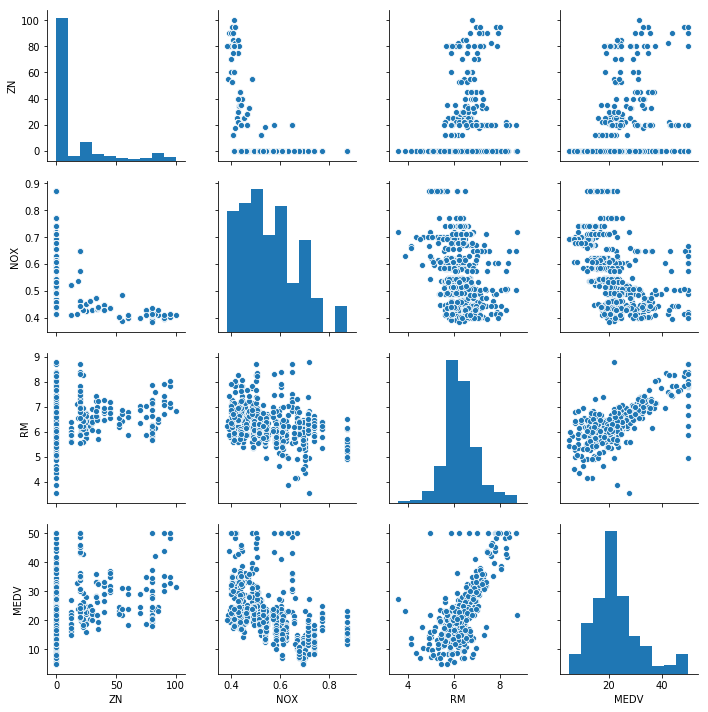

In [51]:
columns = ['ZN', 'NOX', 'RM', 'MEDV']
sns.pairplot(df_data[columns])
plt.show()

### Linear Regression

In [64]:
m_reg = LinearRegression(fit_intercept=True) # fit intercept = beta0 절편 생성여부

In [65]:
m_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
# Returns the coefficient of determination R^2 of the prediction.
#  coefficient of determination, R2 : The values for R2 range from 0 to 1,
# which captures the percentage of squared correlation between the predicted and actual values of the target variable. 
y_pred = m_reg.predict(x_test)
m_reg.score(x_test,y_test)

0.7108002368966582

### Ordinary Least Square Method

In [67]:
m_reg_ols = sm.OLS(y_train,x_train).fit()
m_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     719.0
Date:                Wed, 02 Jan 2019   Prob (F-statistic):          1.29e-263
Time:                        11:37:58   Log-Likelihood:                -1214.1
No. Observations:                 404   AIC:                             2454.
Df Residuals:                     391   BIC:                             2506.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1031      0.036     -2.888      0.004      -0.173      -0.033
x2             0.0551      0.016      3.507      0.001       0.024       0.086
x3            -0.0284      0.069     -0.411      0.682      -0.164       0.107
x4             3.1478      1.032      3.049      0.002       1.118       5.178
x5            -3.4721      3.789     -0.916      0.360     -10.921       3.977
x6             5.8177      0.350     16.637      0.000       5.130       6.505
x7             0.0033      0.015      0.217      0.828      -0.026       0.033
x8            -0.9499      0.215     -4.428      0.000      -1.372      -0.528
x9             0.1740      0.072      2.430      0.016       0.033       0.315
x10           -0.0085      0.004     -2.069      0.039      -0.017      -0.000
x11           -0.3685      0.121     -3.044      0.002      -0.607      -0.130
x12            0.0142      0.003      4.739      0.000       0.008       0.020
x13           -0.4174      0.059     -7.119      0.000      -0.533      -0.302
==============================================================================
Omnibus:                      147.779   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              947.122
Skew:                           1.407   Prob(JB):                    2.16e-206
Kurtosis:                       9.953   Cond. No.                     8.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MSE(Mean Squared Error)

In [69]:
# y_pred = m_reg.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
print(mse)

25.80167


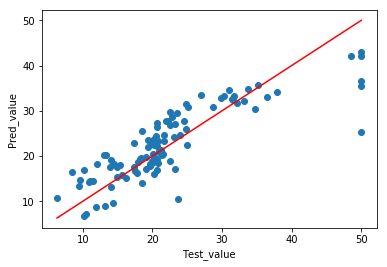

In [70]:
plt.scatter(y_test,y_pred)
line = np.linspace(min(y_test), max(y_test), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('Test_value')
plt.ylabel('Pred_value')
plt.show()

## Sensitivity

## USING MEDV, RM, PRATIO for EDA
- MEAN, MEDIAN, STANDARD DEVIATION ETC
- R^2 SCORE
- WITH DEPTH

In [78]:

data = pd.read_csv('BostonHousing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
mean_price = np.mean(prices)
median_price = np.median(prices)
# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $5.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


In [76]:
minimum_price = np.amin(prices)
maximum_price = np.amin(prices)
mean_price = np.mean(prices)

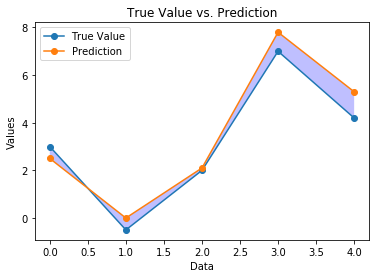

In [87]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])

a=[3, -0.5, 2, 7, 4.2]
b=[2.5, 0.0, 2.1, 7.8, 5.3]
plt.figure()
plt.plot(a, '-o', b, '-o')
plt.gca().fill_between(range(len(a)), 
                       a, b, 
                       facecolor='blue', 
                       alpha=0.25)
plt.title('True Value vs. Prediction')
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction'])

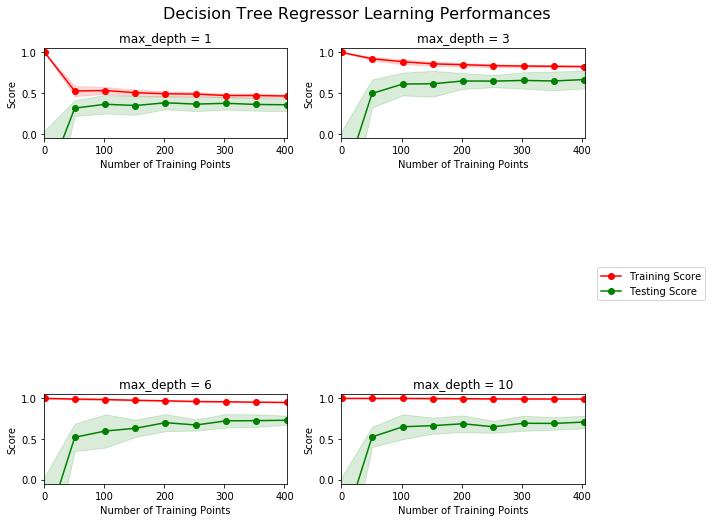

In [89]:
# Learning Curves
# decision tree model with different maximum depths. 
vs.ModelLearning(features, prices)

In [123]:
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=40)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [129]:
# Greed Search
def fit_model(X,y):
    # Create cross-validation sets
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    # Decision Tree Regressor
    regressor = DecisionTreeRegressor()
    # Create a dictionary : max_depth (1~10 range)
    params = {'max_depth': [i+1 for i in range(10)]}
    # Transform 'performance_metric' into a scoring function using make_scorer
    scoring_fnc = make_scorer(performance_metric)
    # Grid Search
    # score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
    grid = GridSearchCV(regressor, param_grid=params, cv=cv_sets, scoring=scoring_fnc)
    
    # Fit the grid search object to the data to commpute the optimal model
    grid = grid.fit(X,y)
    # Retrun the optimal model after fitting the data
    return grid.best_estimator_

In [130]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 6 for the optimal model.


### Predicting Selling Price
- 1:(RM) total umber of rooms in home
- 2:Poverty level
- 3:Student-teacher ratio of nearby schools

In [131]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 3 

### Insight

1. There are 5 rooms which is sizeable, the poverty level is quie low, and the s-t ratio is average. The price should be around the median price.
2. 4 rooms isn't many, the poverty level is very high (almost a third of residents in the neighborhood are in poverty), and the s-t ratio is terrible. The price should be very low, although not minimal.
3. 8 rooms indicates it's a large house, the poverty level is extremely low (there are almost no residents in poverty in the respective neighborhood), and the s-t ratio is low. I expect the price to be very high.

## Modeling Keras


In [187]:
h_units = 32
activation_ = 'relu'

def dnn_model():
    model = Sequential()
    
    model.add(Dense(units = h_units, input_dim = 13))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units = h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units = h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units = h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units=1))
    
    return model

In [188]:
# loss function
model = dnn_model()

In [189]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [197]:
# training
hist = model.fit(x_train, y_train, epochs = 200, batch_size=8, verbose=True, validation_data=(x_test,y_test), shuffle= True)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 1s 2ms/step - loss: 19.9459 - val_loss: 9.8252
Epoch 2/200
404/404 [==============================] - 0s 1ms/step - loss: 20.1453 - val_loss: 10.3370
Epoch 3/200
404/404 [==============================] - 0s 1ms/step - loss: 29.6643 - val_loss: 10.1029
Epoch 4/200
404/404 [==============================] - 0s 1ms/step - loss: 22.8163 - val_loss: 10.2178
Epoch 5/200
404/404 [==============================] - 0s 1ms/step - loss: 21.7232 - val_loss: 9.8011
Epoch 6/200
404/404 [==============================] - 0s 1ms/step - loss: 19.3736 - val_loss: 9.9656
Epoch 7/200
404/404 [==============================] - 0s 1ms/step - loss: 20.9397 - val_loss: 10.0405
Epoch 8/200
404/404 [==============================] - 0s 1ms/step - loss: 21.7933 - val_loss: 9.9455
Epoch 9/200
404/404 [==============================] - 0s 1ms/step - loss: 22.1983 - val_loss: 9.7294
Epoch 10/200
404/404 [==========

404/404 [==============================] - 0s 1ms/step - loss: 21.7376 - val_loss: 9.7093
Epoch 80/200
404/404 [==============================] - 0s 1ms/step - loss: 19.8352 - val_loss: 9.8621
Epoch 81/200
404/404 [==============================] - 0s 945us/step - loss: 26.9157 - val_loss: 10.3911
Epoch 82/200
404/404 [==============================] - 0s 973us/step - loss: 24.2186 - val_loss: 10.2567
Epoch 83/200
404/404 [==============================] - 0s 1ms/step - loss: 22.8499 - val_loss: 9.8384
Epoch 84/200
404/404 [==============================] - 0s 1ms/step - loss: 22.6256 - val_loss: 9.9629
Epoch 85/200
404/404 [==============================] - 0s 1ms/step - loss: 24.1307 - val_loss: 9.5232
Epoch 86/200
404/404 [==============================] - 0s 1ms/step - loss: 22.2646 - val_loss: 10.2149
Epoch 87/200
404/404 [==============================] - 0s 1ms/step - loss: 24.3704 - val_loss: 10.6303
Epoch 88/200
404/404 [==============================] - 0s 1ms/step - loss: 22

404/404 [==============================] - 0s 1ms/step - loss: 22.6592 - val_loss: 10.0373
Epoch 158/200
404/404 [==============================] - 0s 1ms/step - loss: 21.0288 - val_loss: 9.4543
Epoch 159/200
404/404 [==============================] - 0s 1ms/step - loss: 24.0361 - val_loss: 9.1832
Epoch 160/200
404/404 [==============================] - 0s 1ms/step - loss: 21.7779 - val_loss: 9.6141
Epoch 161/200
404/404 [==============================] - 0s 1ms/step - loss: 18.5487 - val_loss: 9.2574
Epoch 162/200
404/404 [==============================] - 0s 1ms/step - loss: 19.9361 - val_loss: 9.7537
Epoch 163/200
404/404 [==============================] - 0s 1ms/step - loss: 24.0130 - val_loss: 9.7509
Epoch 164/200
404/404 [==============================] - 0s 1ms/step - loss: 20.9464 - val_loss: 9.9627
Epoch 165/200
404/404 [==============================] - 0s 1ms/step - loss: 17.5226 - val_loss: 9.5463
Epoch 166/200
404/404 [==============================] - 0s 1ms/step - loss: 

# Boosting (Training)

In [198]:
# training
bs = 8
for iter in range(6):
    hist = model.fit(x_train, y_train, epochs = 200, batch_size=bs, verbose=True, \
                     validation_data=(x_test,y_test), shuffle= True)
    bs += 2
    

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 1ms/step - loss: 22.8698 - val_loss: 9.3971
Epoch 2/200
404/404 [==============================] - 0s 1ms/step - loss: 19.8744 - val_loss: 9.0150
Epoch 3/200
404/404 [==============================] - 0s 1ms/step - loss: 23.5460 - val_loss: 9.0504
Epoch 4/200
404/404 [==============================] - 0s 1ms/step - loss: 19.8395 - val_loss: 9.6271
Epoch 5/200
404/404 [==============================] - 0s 1ms/step - loss: 18.8597 - val_loss: 9.9729
Epoch 6/200
404/404 [==============================] - 0s 1ms/step - loss: 19.1615 - val_loss: 9.7642
Epoch 7/200
404/404 [==============================] - 0s 990us/step - loss: 21.3883 - val_loss: 10.2308
Epoch 8/200
404/404 [==============================] - 0s 1ms/step - loss: 16.0835 - val_loss: 10.2096
Epoch 9/200
404/404 [==============================] - 0s 1ms/step - loss: 23.5081 - val_loss: 10.2614
Epoch 10/200
404/404 [=========

Epoch 80/200
404/404 [==============================] - 0s 1ms/step - loss: 20.1458 - val_loss: 9.5497
Epoch 81/200
404/404 [==============================] - 0s 1ms/step - loss: 19.1328 - val_loss: 9.3738
Epoch 82/200
404/404 [==============================] - 0s 1ms/step - loss: 19.8560 - val_loss: 8.9866
Epoch 83/200
404/404 [==============================] - 0s 1ms/step - loss: 24.0998 - val_loss: 9.0402
Epoch 84/200
404/404 [==============================] - 0s 936us/step - loss: 18.4970 - val_loss: 8.5808
Epoch 85/200
404/404 [==============================] - 0s 995us/step - loss: 19.7451 - val_loss: 8.9768
Epoch 86/200
404/404 [==============================] - 0s 948us/step - loss: 19.3439 - val_loss: 9.1257
Epoch 87/200
404/404 [==============================] - 0s 987us/step - loss: 20.2388 - val_loss: 9.1726
Epoch 88/200
404/404 [==============================] - 0s 983us/step - loss: 19.8215 - val_loss: 8.8648
Epoch 89/200
404/404 [==============================] - 0s 1ms/

Epoch 158/200
404/404 [==============================] - 0s 958us/step - loss: 21.5753 - val_loss: 9.1107
Epoch 159/200
404/404 [==============================] - 0s 943us/step - loss: 17.5910 - val_loss: 9.0064
Epoch 160/200
404/404 [==============================] - 0s 987us/step - loss: 17.7898 - val_loss: 9.2342
Epoch 161/200
404/404 [==============================] - 0s 980us/step - loss: 21.4901 - val_loss: 9.4489
Epoch 162/200
404/404 [==============================] - 0s 1ms/step - loss: 21.3455 - val_loss: 9.1022
Epoch 163/200
404/404 [==============================] - 0s 1ms/step - loss: 22.4269 - val_loss: 9.2361
Epoch 164/200
404/404 [==============================] - 0s 983us/step - loss: 17.8350 - val_loss: 8.8734
Epoch 165/200
404/404 [==============================] - 0s 978us/step - loss: 19.9151 - val_loss: 8.7770
Epoch 166/200
404/404 [==============================] - 0s 1ms/step - loss: 22.4871 - val_loss: 8.9196
Epoch 167/200
404/404 [=============================

404/404 [==============================] - 0s 983us/step - loss: 18.8240 - val_loss: 8.4715
Epoch 36/200
404/404 [==============================] - 0s 1ms/step - loss: 20.9386 - val_loss: 8.4429
Epoch 37/200
404/404 [==============================] - 0s 970us/step - loss: 18.9960 - val_loss: 8.7219
Epoch 38/200
404/404 [==============================] - 0s 990us/step - loss: 20.5104 - val_loss: 8.6837
Epoch 39/200
404/404 [==============================] - 0s 965us/step - loss: 23.3669 - val_loss: 8.6664
Epoch 40/200
404/404 [==============================] - 0s 1ms/step - loss: 27.5295 - val_loss: 8.5544
Epoch 41/200
404/404 [==============================] - 0s 970us/step - loss: 17.0634 - val_loss: 8.7089
Epoch 42/200
404/404 [==============================] - 0s 1ms/step - loss: 16.9870 - val_loss: 8.7311
Epoch 43/200
404/404 [==============================] - 0s 997us/step - loss: 17.1613 - val_loss: 8.8911
Epoch 44/200
404/404 [==============================] - 0s 992us/step - lo

404/404 [==============================] - 0s 978us/step - loss: 18.2956 - val_loss: 8.7654
Epoch 114/200
404/404 [==============================] - 0s 1ms/step - loss: 15.0466 - val_loss: 8.7938
Epoch 115/200
404/404 [==============================] - 0s 975us/step - loss: 18.6931 - val_loss: 8.3098
Epoch 116/200
404/404 [==============================] - 0s 992us/step - loss: 20.0537 - val_loss: 8.8222
Epoch 117/200
404/404 [==============================] - 0s 990us/step - loss: 22.4575 - val_loss: 8.5303
Epoch 118/200
404/404 [==============================] - 0s 992us/step - loss: 22.2503 - val_loss: 8.4488
Epoch 119/200
404/404 [==============================] - 0s 973us/step - loss: 18.9841 - val_loss: 8.5487
Epoch 120/200
404/404 [==============================] - 0s 997us/step - loss: 18.7603 - val_loss: 8.8063
Epoch 121/200
404/404 [==============================] - 0s 997us/step - loss: 17.3116 - val_loss: 8.6814
Epoch 122/200
404/404 [==============================] - 0s 1m

404/404 [==============================] - 0s 1ms/step - loss: 17.3606 - val_loss: 8.6449
Epoch 192/200
404/404 [==============================] - 0s 1ms/step - loss: 21.8393 - val_loss: 8.5007
Epoch 193/200
404/404 [==============================] - 0s 1ms/step - loss: 18.7682 - val_loss: 8.4204
Epoch 194/200
404/404 [==============================] - 0s 1ms/step - loss: 17.6209 - val_loss: 8.4179
Epoch 195/200
404/404 [==============================] - 0s 1ms/step - loss: 15.7240 - val_loss: 8.1377
Epoch 196/200
404/404 [==============================] - 0s 1ms/step - loss: 22.4172 - val_loss: 8.7035
Epoch 197/200
404/404 [==============================] - 0s 1ms/step - loss: 19.4146 - val_loss: 8.7898
Epoch 198/200
404/404 [==============================] - 0s 1ms/step - loss: 17.1879 - val_loss: 8.4987
Epoch 199/200
404/404 [==============================] - 0s 990us/step - loss: 16.9046 - val_loss: 8.4970
Epoch 200/200
404/404 [==============================] - 0s 995us/step - los

404/404 [==============================] - 0s 1ms/step - loss: 19.7783 - val_loss: 8.3180
Epoch 71/200
404/404 [==============================] - 0s 1ms/step - loss: 18.0764 - val_loss: 8.3580
Epoch 72/200
404/404 [==============================] - 0s 1ms/step - loss: 18.2551 - val_loss: 8.2315
Epoch 73/200
404/404 [==============================] - 0s 1ms/step - loss: 17.7913 - val_loss: 8.2100
Epoch 74/200
404/404 [==============================] - 0s 1ms/step - loss: 19.6351 - val_loss: 8.2802
Epoch 75/200
404/404 [==============================] - 0s 1ms/step - loss: 19.1176 - val_loss: 8.3713
Epoch 76/200
404/404 [==============================] - 0s 1ms/step - loss: 21.0161 - val_loss: 7.9491
Epoch 77/200
404/404 [==============================] - 0s 1ms/step - loss: 18.0017 - val_loss: 8.5135
Epoch 78/200
404/404 [==============================] - 0s 1ms/step - loss: 13.9234 - val_loss: 8.7412
Epoch 79/200
404/404 [==============================] - 0s 1ms/step - loss: 17.2584 - 

404/404 [==============================] - 0s 1ms/step - loss: 20.1130 - val_loss: 8.1434
Epoch 149/200
404/404 [==============================] - 0s 1ms/step - loss: 17.1444 - val_loss: 8.1997
Epoch 150/200
404/404 [==============================] - 0s 978us/step - loss: 17.4094 - val_loss: 8.1325
Epoch 151/200
404/404 [==============================] - 0s 990us/step - loss: 15.7399 - val_loss: 7.9676
Epoch 152/200
404/404 [==============================] - 0s 980us/step - loss: 17.8938 - val_loss: 8.1810
Epoch 153/200
404/404 [==============================] - 0s 948us/step - loss: 18.2379 - val_loss: 7.9461
Epoch 154/200
404/404 [==============================] - 0s 970us/step - loss: 19.9515 - val_loss: 7.9601
Epoch 155/200
404/404 [==============================] - 0s 990us/step - loss: 17.6444 - val_loss: 7.8640
Epoch 156/200
404/404 [==============================] - 0s 1ms/step - loss: 18.9888 - val_loss: 8.0932
Epoch 157/200
404/404 [==============================] - 0s 1ms/st

Epoch 26/200
404/404 [==============================] - 0s 1ms/step - loss: 18.1445 - val_loss: 8.2200
Epoch 27/200
404/404 [==============================] - 0s 1ms/step - loss: 18.3824 - val_loss: 8.1702
Epoch 28/200
404/404 [==============================] - 0s 980us/step - loss: 19.1407 - val_loss: 8.1406
Epoch 29/200
404/404 [==============================] - 0s 997us/step - loss: 16.0688 - val_loss: 8.1960
Epoch 30/200
404/404 [==============================] - 0s 987us/step - loss: 19.7793 - val_loss: 8.7127
Epoch 31/200
404/404 [==============================] - 0s 992us/step - loss: 16.1713 - val_loss: 8.5440
Epoch 32/200
404/404 [==============================] - 0s 1ms/step - loss: 17.2299 - val_loss: 8.5991
Epoch 33/200
404/404 [==============================] - 0s 983us/step - loss: 20.8547 - val_loss: 8.3392
Epoch 34/200
404/404 [==============================] - 0s 995us/step - loss: 18.5412 - val_loss: 8.5186
Epoch 35/200
404/404 [==============================] - 0s 1m

Epoch 105/200
404/404 [==============================] - 0s 1ms/step - loss: 18.1947 - val_loss: 8.4973
Epoch 106/200
404/404 [==============================] - 0s 1ms/step - loss: 16.3547 - val_loss: 8.4158
Epoch 107/200
404/404 [==============================] - 0s 1ms/step - loss: 17.1015 - val_loss: 8.2091
Epoch 108/200
404/404 [==============================] - 0s 1ms/step - loss: 22.4651 - val_loss: 8.1508
Epoch 109/200
404/404 [==============================] - 0s 1ms/step - loss: 15.6427 - val_loss: 8.2137
Epoch 110/200
404/404 [==============================] - 0s 1ms/step - loss: 17.5217 - val_loss: 8.0889
Epoch 111/200
404/404 [==============================] - 0s 1ms/step - loss: 20.5791 - val_loss: 8.0550
Epoch 112/200
404/404 [==============================] - 0s 1ms/step - loss: 17.9773 - val_loss: 8.0295
Epoch 113/200
404/404 [==============================] - 0s 1ms/step - loss: 18.5487 - val_loss: 7.7932
Epoch 114/200
404/404 [==============================] - 0s 955u

404/404 [==============================] - 0s 1ms/step - loss: 19.7364 - val_loss: 8.2456
Epoch 184/200
404/404 [==============================] - 0s 1ms/step - loss: 17.2674 - val_loss: 8.2198
Epoch 185/200
404/404 [==============================] - 0s 1ms/step - loss: 15.7763 - val_loss: 8.4009
Epoch 186/200
404/404 [==============================] - 0s 1ms/step - loss: 22.2396 - val_loss: 8.4349
Epoch 187/200
404/404 [==============================] - 0s 1ms/step - loss: 17.7176 - val_loss: 8.6383
Epoch 188/200
404/404 [==============================] - 0s 1ms/step - loss: 19.7297 - val_loss: 8.6611
Epoch 189/200
404/404 [==============================] - 0s 1ms/step - loss: 14.8963 - val_loss: 8.5876
Epoch 190/200
404/404 [==============================] - 0s 968us/step - loss: 16.1654 - val_loss: 8.5863
Epoch 191/200
404/404 [==============================] - 0s 1ms/step - loss: 18.0200 - val_loss: 8.5993
Epoch 192/200
404/404 [==============================] - 0s 1ms/step - loss:

Epoch 62/200
404/404 [==============================] - 0s 1ms/step - loss: 16.3821 - val_loss: 7.8799
Epoch 63/200
404/404 [==============================] - 0s 1ms/step - loss: 16.1694 - val_loss: 7.4104
Epoch 64/200
404/404 [==============================] - 0s 1ms/step - loss: 17.8937 - val_loss: 7.5422
Epoch 65/200
404/404 [==============================] - 0s 1ms/step - loss: 17.0472 - val_loss: 7.9262
Epoch 66/200
404/404 [==============================] - 0s 1ms/step - loss: 16.6908 - val_loss: 7.8174
Epoch 67/200
404/404 [==============================] - 0s 995us/step - loss: 16.4208 - val_loss: 7.7358
Epoch 68/200
404/404 [==============================] - 0s 1ms/step - loss: 15.8579 - val_loss: 7.8448
Epoch 69/200
404/404 [==============================] - 0s 1ms/step - loss: 17.9525 - val_loss: 8.0076
Epoch 70/200
404/404 [==============================] - 0s 1ms/step - loss: 15.7129 - val_loss: 8.0369
Epoch 71/200
404/404 [==============================] - 0s 1ms/step - l

Epoch 141/200
404/404 [==============================] - 0s 1ms/step - loss: 16.7333 - val_loss: 8.2563
Epoch 142/200
404/404 [==============================] - 0s 1ms/step - loss: 18.3795 - val_loss: 8.5712
Epoch 143/200
404/404 [==============================] - 0s 1ms/step - loss: 15.4320 - val_loss: 8.4769
Epoch 144/200
404/404 [==============================] - 0s 1ms/step - loss: 21.0512 - val_loss: 7.8744
Epoch 145/200
404/404 [==============================] - 0s 1ms/step - loss: 20.1611 - val_loss: 8.1867
Epoch 146/200
404/404 [==============================] - 0s 1ms/step - loss: 14.6789 - val_loss: 7.7910
Epoch 147/200
404/404 [==============================] - 0s 1ms/step - loss: 15.7190 - val_loss: 7.9240
Epoch 148/200
404/404 [==============================] - 0s 1ms/step - loss: 18.0265 - val_loss: 7.8193
Epoch 149/200
404/404 [==============================] - 0s 1ms/step - loss: 16.0715 - val_loss: 7.8566
Epoch 150/200
404/404 [==============================] - 0s 1ms/

404/404 [==============================] - 0s 1ms/step - loss: 17.3102 - val_loss: 7.7783
Epoch 20/200
404/404 [==============================] - 0s 1ms/step - loss: 17.1401 - val_loss: 7.5780
Epoch 21/200
404/404 [==============================] - 0s 1ms/step - loss: 16.3779 - val_loss: 7.8998
Epoch 22/200
404/404 [==============================] - 0s 1ms/step - loss: 19.1022 - val_loss: 8.1040
Epoch 23/200
404/404 [==============================] - 0s 1ms/step - loss: 18.9707 - val_loss: 8.1180
Epoch 24/200
404/404 [==============================] - 0s 1ms/step - loss: 16.6115 - val_loss: 8.2084
Epoch 25/200
404/404 [==============================] - 0s 1ms/step - loss: 17.9617 - val_loss: 8.2320
Epoch 26/200
404/404 [==============================] - 0s 1ms/step - loss: 16.3270 - val_loss: 8.2559
Epoch 27/200
404/404 [==============================] - 0s 1ms/step - loss: 18.2784 - val_loss: 8.1491
Epoch 28/200
404/404 [==============================] - 0s 1ms/step - loss: 14.8194 - 

404/404 [==============================] - 0s 985us/step - loss: 16.2658 - val_loss: 7.6920
Epoch 99/200
404/404 [==============================] - 0s 938us/step - loss: 16.8258 - val_loss: 7.6115
Epoch 100/200
404/404 [==============================] - 0s 1ms/step - loss: 16.1024 - val_loss: 7.7514
Epoch 101/200
404/404 [==============================] - 0s 1ms/step - loss: 17.8275 - val_loss: 7.8798
Epoch 102/200
404/404 [==============================] - 0s 916us/step - loss: 14.1899 - val_loss: 7.6109
Epoch 103/200
404/404 [==============================] - 0s 938us/step - loss: 16.4210 - val_loss: 7.6189
Epoch 104/200
404/404 [==============================] - 0s 908us/step - loss: 17.1998 - val_loss: 7.6061
Epoch 105/200
404/404 [==============================] - 0s 1ms/step - loss: 16.3757 - val_loss: 7.9841
Epoch 106/200
404/404 [==============================] - 0s 1ms/step - loss: 20.0151 - val_loss: 7.7036
Epoch 107/200
404/404 [==============================] - 0s 1ms/step 

404/404 [==============================] - 0s 958us/step - loss: 16.8075 - val_loss: 7.9097
Epoch 177/200
404/404 [==============================] - 0s 1000us/step - loss: 19.6434 - val_loss: 7.7532
Epoch 178/200
404/404 [==============================] - 0s 995us/step - loss: 17.9734 - val_loss: 7.9032
Epoch 179/200
404/404 [==============================] - 0s 1ms/step - loss: 20.9033 - val_loss: 8.0814
Epoch 180/200
404/404 [==============================] - 0s 980us/step - loss: 15.5253 - val_loss: 7.9106
Epoch 181/200
404/404 [==============================] - 0s 968us/step - loss: 18.6912 - val_loss: 7.9373
Epoch 182/200
404/404 [==============================] - 0s 1ms/step - loss: 21.5731 - val_loss: 7.8633
Epoch 183/200
404/404 [==============================] - 0s 1ms/step - loss: 16.3204 - val_loss: 7.9454
Epoch 184/200
404/404 [==============================] - 0s 1ms/step - loss: 18.2051 - val_loss: 8.1594
Epoch 185/200
404/404 [==============================] - 0s 987us/s

In [199]:
from keras.models import load_model

model.save('boston_keras_perceptron_boosting.h5')

In [200]:
# evaluation
y_pred = model.predict(x_test, batch_size=512)
print(y_pred.shape, y_test.shape)

model.evaluate(x=x_test, y=y_test, batch_size=128, verbose=1)

(102, 1) (102, 1)
102/102 [==============================] - 0s 29us/step


8.081120491027832

In [201]:
# comparison of the true and estimated values 

result = pd.DataFrame(
    {
    "y_true" : y_test[:,0],
    "y_pred" : y_pred[:,0]
}
)

In [202]:
# save as csv
result.to_csv('result_boston_perceptron_boosting.csv', index=False)
result.head(20)

,y_true,y_pred
0,20.500000,20.454103
1,21.500000,21.197851
2,7.400000,8.485955
3,20.799999,25.006926
4,22.200001,20.232256
5,32.200001,30.033232
6,16.299999,12.751109
7,31.700001,31.445442
8,19.100000,21.589674
9,19.799999,19.769918


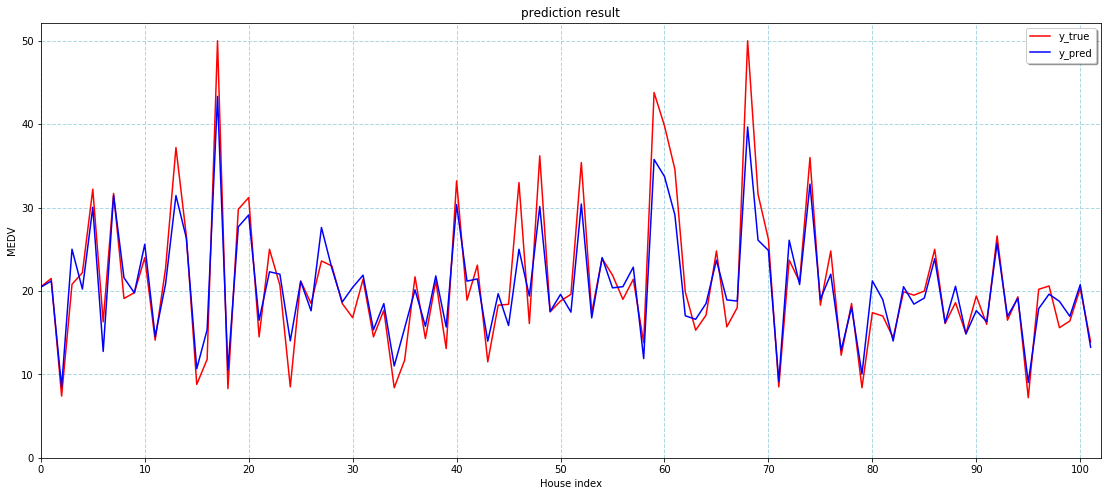

In [203]:
# Plotting the Prediction result
plt.figure(figsize=(19,8))

plt.plot(y_test,'r', label='y_true')
plt.plot(y_pred,'b', label='y_pred')

plt.legend(shadow=True, loc='upper right')

plt.title('prediction result')
plt.xlabel('House index')
plt.ylabel('MEDV')

plt.xlim(left = 0, right = len(y_test))
plt.ylim(bottom=0)

plt.grid(color='lightblue', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,101,10))
plt.yticks(np.arange(0,51,10))

plt.savefig('prediction_result_boosting.png')
plt.show()

In [185]:
# feature scaling
df_data2 = df_data.copy()
df_data2 = (df_data2 - df_data2.mean()) / df_data2.std()
df_data2 = 1.0 / (1 + np.exp(-df_data2)) #sigmoid function
df_data2.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.396668,0.570661,0.216423,0.432335,0.464043,0.601870,0.470062,0.534962,0.272521,0.339404,0.188841,0.608406,0.254548,0.539798
1,0.397252,0.380544,0.355994,0.432335,0.323107,0.548369,0.590686,0.635668,0.295874,0.271633,0.424874,0.608406,0.379434,0.474666
2,0.397252,0.380544,0.355994,0.432335,0.323107,0.782696,0.434000,0.635668,0.295874,0.271633,0.424874,0.597735,0.230138,0.789670
3,0.397393,0.380544,0.213226,0.432335,0.302703,0.734056,0.308085,0.745864,0.320347,0.248800,0.528200,0.602466,0.204213,0.765233
4,0.398415,0.380544,0.213226,0.432335,0.302703,0.773357,0.375035,0.745864,0.320347,0.248800,0.528200,0.608406,0.263960,0.815482
5,0.397323,0.380544,0.213226,0.432335,0.302703,0.551539,0.413186,0.745864,0.320347,0.248800,0.528200,0.601127,0.260708,0.661628
6,0.398951,0.512179,0.383154,0.432335,0.434162,0.404192,0.482467,0.698131,0.372271,0.359635,0.181867,0.605008,0.492191,0.509980
7,0.400521,0.512179,0.383154,0.432335,0.434162,0.460009,0.726680,0.735678,0.372271,0.359635,0.181867,0.608406,0.712959,0.621658
8,0.402384,0.512179,0.383154,0.432335,0.434162,0.282867,0.753318,0.747651,0.372271,0.359635,0.181867,0.581303,0.918293,0.341651
9,0.401232,0.512179,0.383154,0.432335,0.434162,0.401453,0.649190,0.790563,0.372271,0.359635,0.181867,0.581516,0.650839,0.402516


In [186]:
df_data2.corrwith(df_data['MEDV'])
# Convvert pandas to numpy & split into input and label
bh_data2 = np.array(df_data2.values, dtype=np.float32)
data_input = np.array(bh_data2[: , :13], dtype=np.float32).reshape(-1, 13)
data_label = np.array(bh_data[:, 13], dtype=np.float32).reshape(-1,1)
#Split into train / test data
x_train, x_test, y_train, y_test = train_test_split(data_input, data_label, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404, 1) (102, 13) (102, 1)


# Ensemble

In [213]:
#Split into train / test data
x_train_val, x_test, y_train_val, y_test = train_test_split(data_input, data_label, test_size=0.2)
print(x_train_val.shape, y_train_val.shape, x_test.shape, y_test.shape)

# K-flod split
model_num = 5
kf = KFold(n_splits=model_num, shuffle= True)
print(kf)

# Modeling dnn_model
h_units = 32
activation_ = 'relu'

def dnn_model():
    model = Sequential()
    
    model.add(Dense(units = h_units, input_dim = 13))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units = h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units = h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units = h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units=1))
    
    return model
# loss function
model = []
for i in range(model_num):
    tmp = dnn_model()
    tmp.compile(loss='mean_squared_error', optimizer = 'adagrad')
    model.append(tmp)

(404, 13) (404, 1) (102, 13) (102, 1)
KFold(n_splits=5, random_state=None, shuffle=True)


In [215]:
#####****##############****Training#####****##############****
idx = 0
for train_index, test_index in kf.split(x_train_val):
    x_train, x_val = x_train_val[train_index], x_train_val[test_index]
    y_train, y_val = y_train_val[train_index], y_train_val[test_index]
    print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
# training
    bs = 8
    for iter in range(6):
        hist = model[idx].fit(x_train, y_train, epochs = 50, batch_size=bs, verbose=False, \
                         validation_data=(x_val,y_val), shuffle= True)
        bs *= 2
        
    idx += 1

#####****##############****Finished#####****##############****

(323, 13) (323, 1) (81, 13) (81, 1)
(323, 13) (323, 1) (81, 13) (81, 1)
(323, 13) (323, 1) (81, 13) (81, 1)
(323, 13) (323, 1) (81, 13) (81, 1)
(324, 13) (324, 1) (80, 13) (80, 1)


AttributeError: 'list' object has no attribute 'save'

In [216]:
from keras.models import load_model
model.save('boston_keras_perceptron_ensemble.h5')

AttributeError: 'list' object has no attribute 'save'

102/102 [==============================] - 0s 19us/step
(102, 1)
10.534982


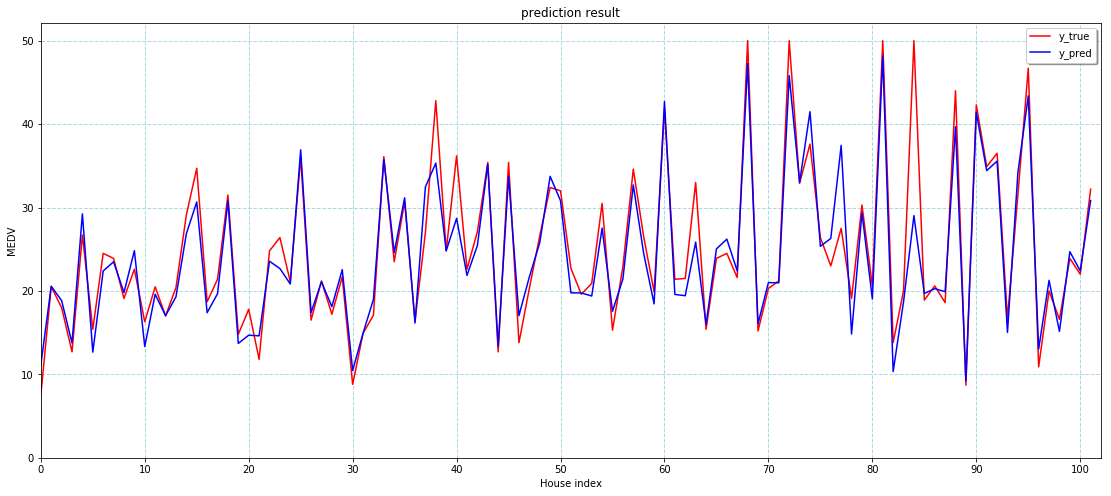

In [217]:


# evaluation
idx = 0

y_pred = []
for i in range(model_num):
    tmp = model[idx].predict(x_test, batch_size = 512)
    y_pred.append(tmp)
    model[idx].evaluate(x=x_test, y=y_test, batch_size=128, verbose=1)
    idx += 1
    
y_pred = np.mean(y_pred,axis=0)
print(y_pred.shape)

y_tmp = np.mean(np.square(np.subtract(y_test,y_pred)))
print(y_tmp)
# comparison of the true and estimated values 

result = pd.DataFrame(
    {
    "y_true" : y_test[:,0],
    "y_pred" : y_pred[:,0]
}
)

# save as csv
result.to_csv('result_boston_perceptron_ensemble.csv', index=False)
result.head(20)

# Plotting the Prediction result
plt.figure(figsize=(19,8))

plt.plot(y_test,'r', label='y_true')
plt.plot(y_pred,'b', label='y_pred')

plt.legend(shadow=True, loc='upper right')

plt.title('prediction result')
plt.xlabel('House index')
plt.ylabel('MEDV')

plt.xlim(left = 0, right = len(y_test))
plt.ylim(bottom=0)

plt.grid(color='lightblue', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,101,10))
plt.yticks(np.arange(0,51,10))

plt.savefig('prediction_result_ensemble.png')
plt.show()